In [1]:
from multi_funcs import *
from funcs import *
from tarjan_alg import *
from os import listdir
from os.path import isfile, join
import numpy as np
import pandas as pd
from guppy import hpy

In [2]:
df = mdf_np(6000, 25)

In [3]:
preferences = df.copy()
matches, _ = run_gale_shapley(df, 25)

In [5]:
matches

,0,1,2,3,4,5,6,7,8,9,...,rank17,rank18,rank19,rank20,rank21,rank22,rank23,rank24,rank25,underdemanded
0,5063,5987,4661,833,359,5947,1158,2119,4146,2729,...,0.755074,0.555802,0.465077,0.238339,0.403579,0.403579,0.403579,0.403579,0.403579,False
1,2998,172,960,1022,119,2425,256,2865,3909,3468,...,0.120516,0.560273,0.379727,0.044641,0.390580,0.178903,0.650116,0.251041,0.251041,False
2,766,3676,5466,4344,301,5223,29,1784,3674,1493,...,0.828806,0.908982,0.419594,0.727053,0.947006,0.957546,0.512350,0.578208,0.750490,False
3,4498,4214,4253,887,2415,4584,418,2735,2244,582,...,0.553026,0.189353,0.018568,0.960469,0.477532,0.477532,0.477532,0.477532,0.477532,False
4,5173,3807,446,3209,4348,4757,772,4653,761,1120,...,0.858586,0.858586,0.858586,0.858586,0.858586,0.858586,0.858586,0.858586,0.858586,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5964,5739,1889,5676,5477,1689,3709,1052,2764,2132,4562,...,0.282334,0.914933,0.914933,0.914933,0.914933,0.914933,0.914933,0.914933,0.914933,False
5965,2740,4398,5291,3518,2152,1479,652,515,5308,5554,...,0.603393,0.465905,0.467538,0.445107,0.031962,0.930850,0.930850,0.930850,0.930850,False
5966,4025,1712,4225,600,4577,1434,2639,1848,5219,1673,...,0.958699,0.528322,0.703582,0.391076,0.571818,0.794173,0.392777,0.974717,0.683698,False
5967,1914,5999,5985,5877,4093,2903,5505,2246,1495,29,...,0.909387,0.185822,0.938183,0.112878,0.112878,0.112878,0.112878,0.112878,0.112878,False


In [6]:
preferences = preferences[preferences['student_id'].isin(matches['student_id'])]
preferences.reset_index(inplace = True, drop = True) 
preferences['rejections'] = matches.applications
relevant = preferences[preferences['rejections'] != 0]
for i in range(1,25):
    relevant.iloc[:, i] = np.where(relevant['rejections']<i+1, -100, relevant.iloc[:, i])
relevant.set_index('student_id', inplace = True)
pointing = pd.DataFrame(relevant.iloc[:, :25].stack(level = 0)).reset_index()
pointing = pointing[pointing[0] != -100]
to_merge = matches.loc[:,[0, 'student_id']]
pointing = pointing.merge(to_merge, on = 0, how = 'left')
pointing = pointing[pointing['student_id_y'].isin(pointing['student_id_x'])]
normalizer = pd.DataFrame(pd.concat([pointing['student_id_x'], pointing['student_id_y']], axis = 0).unique())
normalizer['new_id'] = normalizer.index
pointing = pointing.merge(normalizer, left_on = 'student_id_x', right_on = 0, how = 'left')
pointing = pointing.merge(normalizer, left_on = 'student_id_y', right_on = 0, how = 'left')
pairs = pointing[['new_id_x', 'new_id_y']]
pairs

,new_id_x,new_id_y
0,0,2522
1,0,1349
2,0,259
3,0,1324
4,1,487
...,...,...
19077,4559,1722
19078,4559,770
19079,4559,4545
19080,4559,4652


In [7]:
g = Graph(len(normalizer))

In [8]:
g = Graph(len(normalizer))
for i in range(len(pairs)):
    g.addEdge(pairs.iloc[i, 0], pairs.iloc[i, 1])

In [9]:
g.SCC()

(1,
 [[2285,
   3949,
   185,
   639,
   4038,
   4392,
   3440,
   4093,
   1721,
   4058,
   2026,
   2509,
   1097,
   2549,
   130,
   1148,
   4146,
   1664,
   21,
   3219,
   284,
   1519,
   747,
   1477,
   3569,
   4429,
   2766,
   4533,
   1887,
   666,
   1213,
   3125,
   1170,
   4244,
   328,
   1759,
   3723,
   4293,
   2828,
   204,
   967,
   2878,
   139,
   3842,
   4224,
   4538,
   3220,
   3487,
   1726,
   1023,
   353,
   2691,
   2434,
   3910,
   2737,
   1949,
   1028,
   2951,
   2567,
   1579,
   3961,
   4515,
   3257,
   3484,
   3242,
   3385,
   2444,
   1596,
   4051,
   2798,
   2105,
   3700,
   2039,
   209,
   2095,
   106,
   2598,
   349,
   4302,
   3052,
   1761,
   3168,
   3162,
   170,
   1274,
   2711,
   2584,
   4217,
   3540,
   2929,
   3973,
   3976,
   1950,
   1038,
   2757,
   4269,
   2488,
   4133,
   3875,
   2171,
   3296,
   3475,
   4279,
   4073,
   300,
   4278,
   3024,
   3657,
   3006,
   2973,
   1215,
   2740,
   285

In [2]:
for ks in [2,3,4]:
    for n in [1000,2000,3000,4000,5000,6000,7000,8000,9000,10000]:
        results = gs_f_simulate_nx(10000, n, ks)
        make_df_cycles(n, ks, results, save=True, path = 'data/simulations/graph1_10000/')

In [21]:
results = gs_f_simulate(1000, 9000, 2)
make_df_cycles(9000, 2, results, save=True, path = 'data/simulations/graph1/')

,n,k,n_cycles,n_agents_in_cycles,n_matches,percent_in_cycles
0,9000,2,0,0,6961,0.0
1,9000,2,0,0,6981,0.0
2,9000,2,0,0,6979,0.0
3,9000,2,0,0,6906,0.0
4,9000,2,0,0,6945,0.0
...,...,...,...,...,...,...
995,9000,2,0,0,6966,0.0
996,9000,2,0,0,6975,0.0
997,9000,2,0,0,6946,0.0
998,9000,2,0,0,6951,0.0


In [3]:
from os import listdir
from os.path import isfile, join
onlyfiles = [f for f in listdir('data/simulations/graph1_10000')]

In [4]:
df = concat(onlyfiles, 'data/simulations/graph1_10000/')

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
df2 = df.groupby(['n','k'], as_index=False).mean()

In [7]:
df2['value'] = 1/df2['percent_in_cycles']

Text(0.5, 1.0, 'k=4')

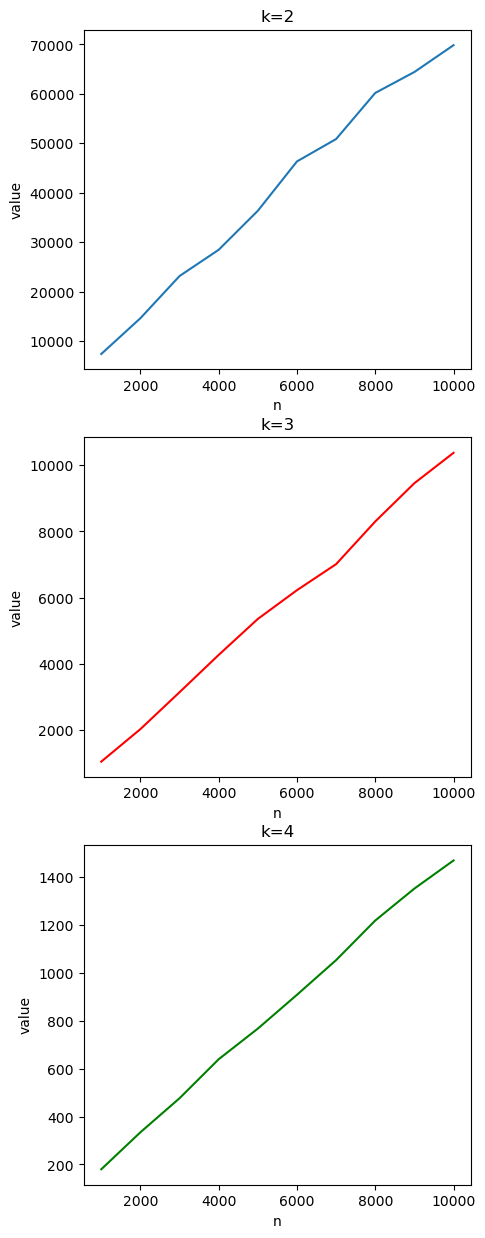

In [8]:
fig, axs = plt.subplots(3, 1, figsize=(5, 15))
sns.axes_style("whitegrid")
sns.lineplot(x = 'n', y = 'value', data = df2[df2['k']==2], ax=axs[0])
sns.lineplot(x = 'n', y = 'value', data = df2[df2['k']==3],color = 'red', ax=axs[1])
sns.lineplot(x = 'n', y = 'value', data = df2[df2['k']==4], color= 'green',ax=axs[2])
axs[0].set_title('k=2')
axs[1].set_title('k=3')
axs[2].set_title('k=4')

Text(0.5, 1.0, 'k=4')

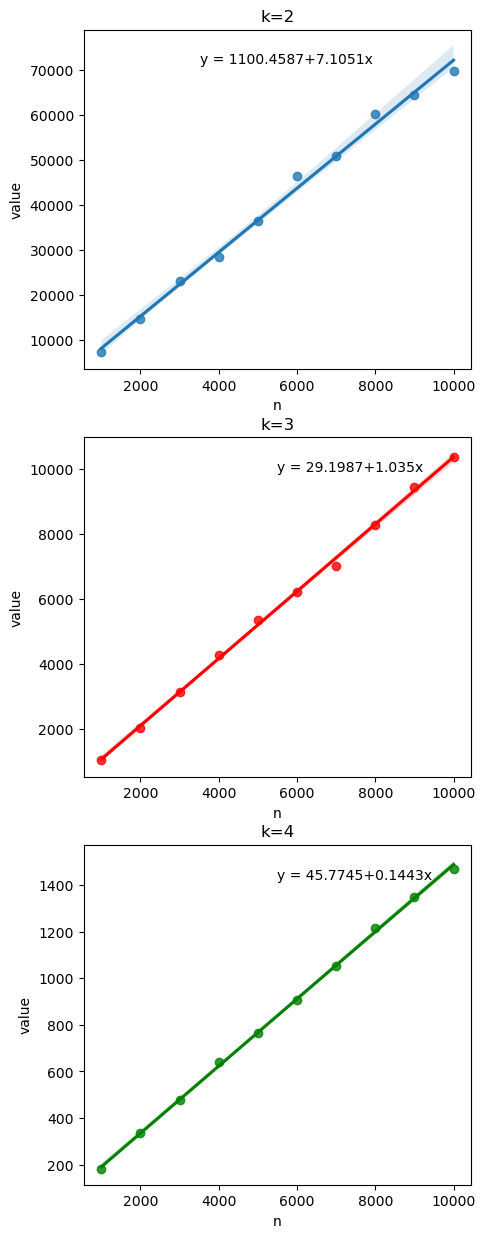

In [26]:
fig, axs = plt.subplots(3, 1, figsize=(5, 15))
sns.axes_style("whitegrid")
sns.regplot(x = 'n', y = 'value', data = df2[df2['k']==2], ax=axs[0])
res1 = stats.linregress(df2[df2['k']==2]['n'], df2[df2['k']==2]['value'])
axs[0].text(0.3, 0.9, 'y = ' + str(round(res1.intercept, 4))+'+'+str(round(res1.slope,4))+'x', transform=axs[0].transAxes)
sns.regplot(x = 'n', y = 'value', data = df2[df2['k']==3],color = 'red', ax=axs[1])
res2 = stats.linregress(df2[df2['k']==3]['n'], df2[df2['k']==3]['value'])
axs[1].text(0.5, 0.9, 'y = ' + str(round(res2.intercept, 4))+'+'+str(round(res2.slope, 4))+'x', transform=axs[1].transAxes)

sns.regplot(x = 'n', y = 'value', data = df2[df2['k']==4], color= 'green',ax=axs[2])

res3 = stats.linregress(df2[df2['k']==4]['n'], df2[df2['k']==4]['value'])
axs[2].text(0.5, 0.9, 'y = ' + str(round(res3.intercept,4))+'+'+str(round(res3.slope,4))+'x', transform=axs[2].transAxes)

axs[0].set_title('k=2')
axs[1].set_title('k=3')
axs[2].set_title('k=4')

In [17]:
from scipy import stats
res1 = stats.linregress(df2[df2['k']==2]['n'], df2[df2['k']==2]['value'])
res1.int

7.105136083172745

In [8]:
ns = list(np.arange(50,1025,25))
ks = list(np.arange(9,11,1))

for n in ns:
    for k in ks:
        results = gs_f_simulate(1000, n, k)
        make_df_cycles(n, k, results, save=True, path = 'data/simulations/graph2/')

In [9]:
onlyfiles2 = [f for f in listdir('data/simulations/graph2')]

In [10]:
df = concat(onlyfiles2, 'data/simulations/graph2/')

In [11]:
df

,Unnamed: 0,n,k,n_cycles,n_agents_in_cycles,n_matches,percent_in_cycles
0,0,1000,10,1,481,971,0.495366
1,1,1000,10,1,457,961,0.475546
2,2,1000,10,1,434,964,0.450207
3,3,1000,10,1,467,968,0.482438
4,4,1000,10,1,432,966,0.447205
...,...,...,...,...,...,...,...
315995,995,975,9,1,336,938,0.358209
315996,996,975,9,1,362,934,0.387580
315997,997,975,9,3,321,936,0.342949
315998,998,975,9,1,388,936,0.414530


Text(0, 0.5, 'Proportion of Students in SCC')

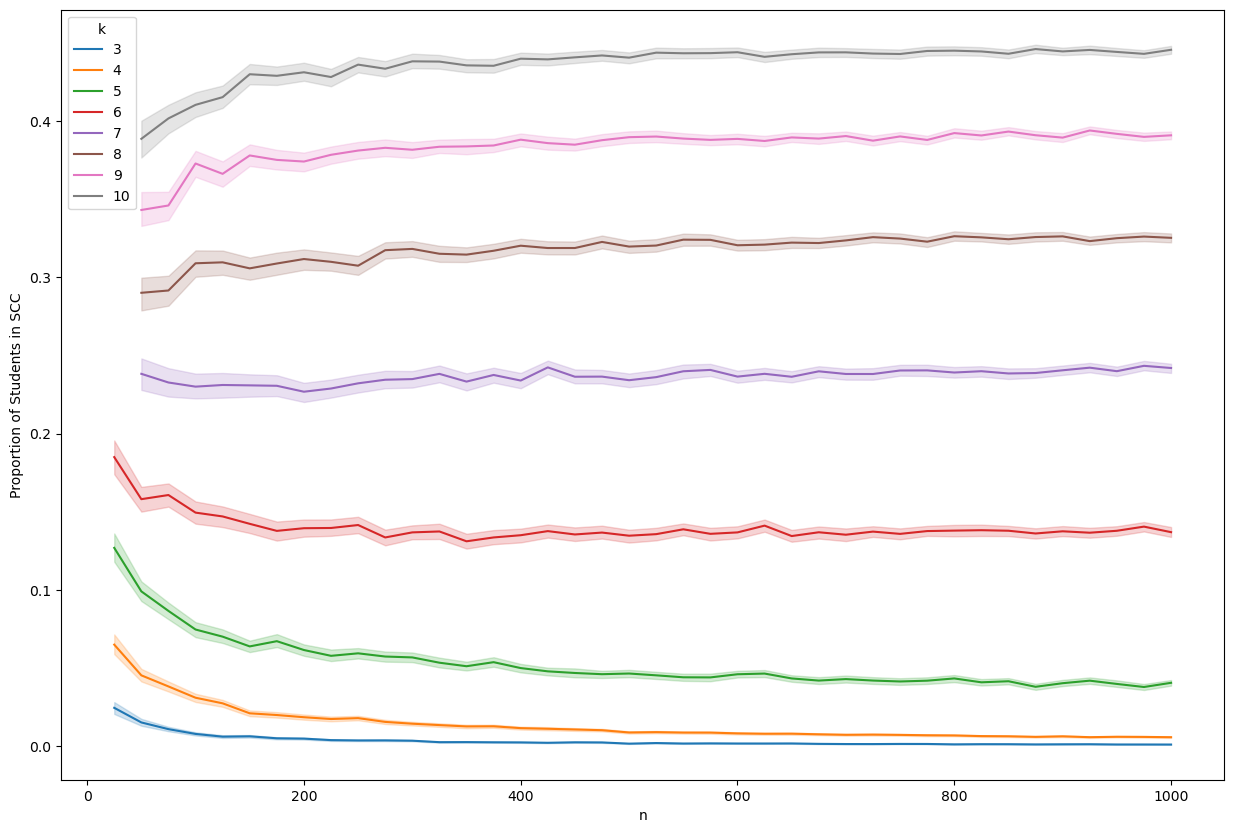

In [13]:
fig, ax = plt.subplots(figsize=(15, 10))
sns.lineplot(x="n", y="percent_in_cycles", hue="k", data=df, ax=ax, palette="tab10", errorbar=("ci", 95))
ax.set_ylabel("Proportion of Students in SCCs")


In [3]:
from os import listdir
from os.path import isfile, join
onlyfiles = [f for f in listdir('data/simulations/larger')]

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
df = concat(onlyfiles, 'data/simulations/larger/')

In [6]:
df

,Unnamed: 0,n,k,n_cycles,n_agents_in_cycles,n_matches,percent_in_cycles
0,0,2000,10,1,845,1917,0.440793
1,1,2000,10,1,849,1933,0.439214
2,2,2000,10,1,900,1936,0.464876
3,3,2000,10,1,893,1928,0.463174
4,4,2000,10,1,827,1935,0.427390
...,...,...,...,...,...,...,...
1495,95,6000,5,8,109,5444,0.020022
1496,96,6000,5,2,328,5463,0.060040
1497,97,6000,5,3,242,5448,0.044420
1498,98,6000,5,2,227,5440,0.041728


<Axes: xlabel='n', ylabel='percent_in_cycles'>

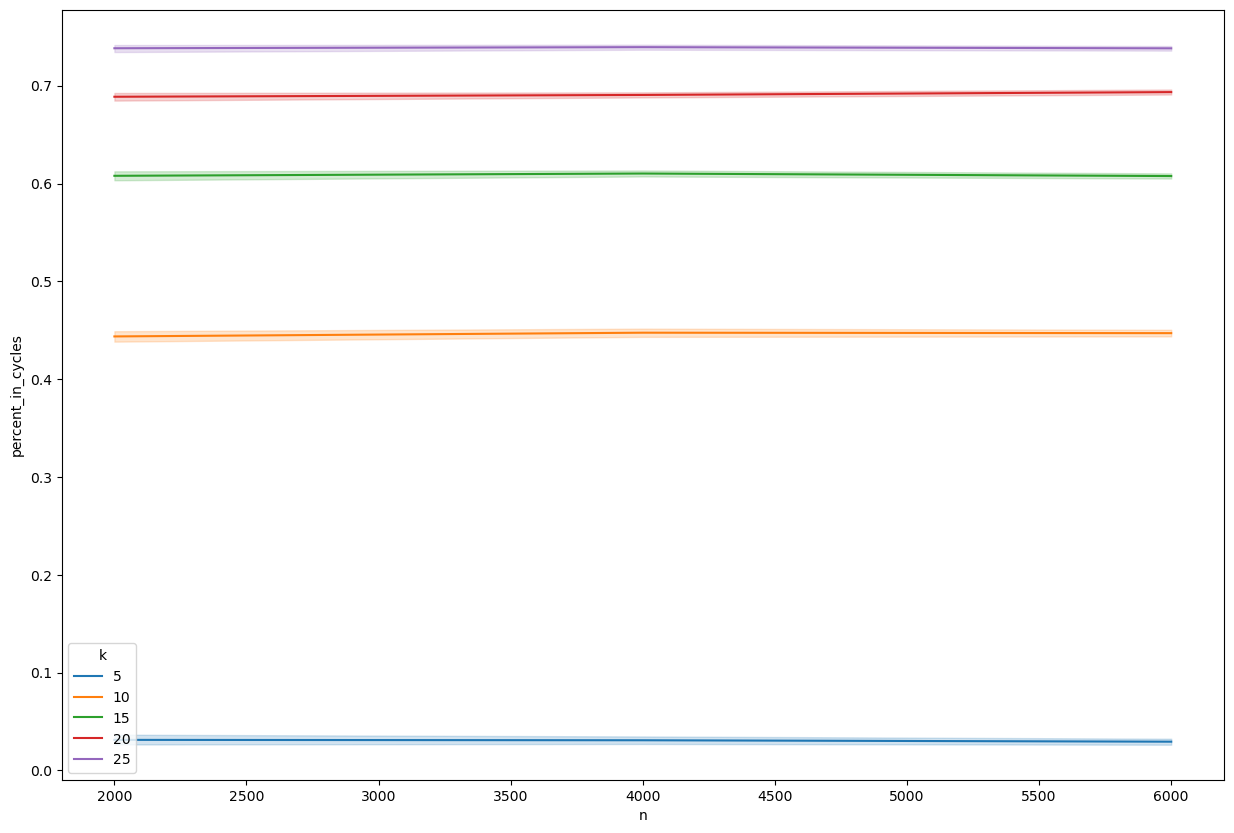

In [7]:
fig, ax = plt.subplots(figsize=(15, 10))
sns.lineplot(x="n", y="percent_in_cycles", hue="k", data=df, ax=ax, palette="tab10", errorbar=("ci", 95))
